In [1]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

from sklearn.externals import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, make_scorer
from sklearn.utils import shuffle

from tools import plot_confusion_matrix

In [2]:
df = pd.read_csv('../data/datatran_2016-2017.csv', dtype={'br_str': str})
df.shape

/Users/leportella/.virtualenvs/udacity/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0,11,13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(180991, 32)

In [3]:
df.target.value_counts()

1    106534
0     64166
2     10291
Name: target, dtype: int64

In [4]:
class0 = df[df.target==0].sample(10537)
class1 = df[df.target==1].sample(10537)
class2 = df[df.target==2]

df2 = shuffle(pd.concat([class0, class1, class2]))

In [5]:
dd = df2[['weekday', 'uf', 'br_str', 'km_int', 
        'moment_of_day', 'climate', 'road_layout', 'target']]
dd = dd.dropna()

In [6]:
X = pd.get_dummies(dd.drop(['target'], axis=1))
y = dd['target']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
model = LogisticRegression()

parameters = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 0.5, 1., 1.5],
    'class_weight': ['balanced', None, {0: 0.33, 1: 0.34, 2: 0.33}]
}


scorer = make_scorer(score_func=accuracy_score)

grid_obj = GridSearchCV(model, parameters, scoring=scorer)

grid_fit = grid_obj.fit(X_train, y_train)

best_clf = grid_fit.best_estimator_

In [9]:
best_clf

LogisticRegression(C=1.5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [10]:
y_pred = best_clf.predict(X_test)

Confusion matrix, without normalization
[[ 976  532  593]
 [ 679  763  664]
 [ 502  430 1134]]


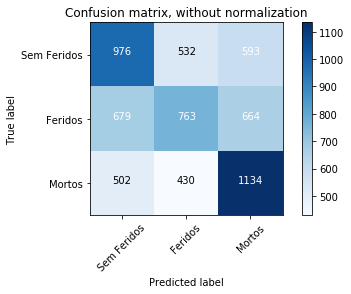

In [11]:
cnf_matrix = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cnf_matrix, classes=['Sem Feridos', 'Feridos', 'Mortos'],
                      title='Confusion matrix, without normalization')

In [12]:
accuracy_score(y_test, y_pred)

0.45799457994579945

In [13]:
from sklearn.metrics import f1_score, classification_report

print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.45      0.46      0.46      2101
          1       0.44      0.36      0.40      2106
          2       0.47      0.55      0.51      2066

avg / total       0.46      0.46      0.45      6273



In [14]:
y_pred_proba = best_clf.predict_proba(X_test)
y_pred_proba

array([[0.22210553, 0.39925686, 0.37863761],
       [0.48835618, 0.24299449, 0.26864932],
       [0.19350942, 0.51035311, 0.29613747],
       ...,
       [0.38845161, 0.29707443, 0.31447396],
       [0.41468104, 0.30609315, 0.27922582],
       [0.37441144, 0.3898856 , 0.23570296]])